In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

import torch
from torch.nn import CrossEntropyLoss, NLLLoss
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from torchinfo import summary

from os.path import exists

from util import test_loss, train_NN

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


In [3]:
batch_size = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=True,
                                        download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=False,
                                       download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

input_shape = (batch_size, 3, 32, 32)
num_labels = 10

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from Models import VGGNet

VGGNN = VGGNet(input_shape, num_labels, initial_lr=0.01, momentum=0.99, weight_decay=0, device=device, p_drop=0.2)

summary(VGGNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
VGGNet                                   [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 32, 32, 32]         896
│    └─ReLU: 2-2                         [100, 32, 32, 32]         --
│    └─Conv2d: 2-3                       [100, 32, 32, 32]         9,248
│    └─ReLU: 2-4                         [100, 32, 32, 32]         --
│    └─MaxPool2d: 2-5                    [100, 32, 16, 16]         --
│    └─Dropout2d: 2-6                    [100, 32, 16, 16]         --
│    └─Conv2d: 2-7                       [100, 64, 16, 16]         18,496
│    └─ReLU: 2-8                         [100, 64, 16, 16]         --
│    └─Conv2d: 2-9                       [100, 64, 16, 16]         36,928
│    └─ReLU: 2-10                        [100, 64, 16, 16]         --
│    └─MaxPool2d: 2-11                   [100, 64, 8, 8]           --
│  

In [5]:
PATH = "models/VGG/VGGNet.pth"

if exists(PATH):
    VGGNN = torch.load(PATH)
    VGGNN.eval()

In [10]:
criterion = CrossEntropyLoss()

train_NN(VGGNN, criterion, train_dataloader,
        test_dataloader, epochs=4, batches_to_test=100,patience=2,device=device, print_test=True, verbose=True)

[1,   100] train_loss: 1.397
test_loss: 1.299, test_accuracy: 52.24
[1,   200] train_loss: 1.401
test_loss: 1.287, test_accuracy: 52.89
[1,   300] train_loss: 1.419
test_loss: 1.301, test_accuracy: 52.23
[1,   400] train_loss: 1.394
test_loss: 1.280, test_accuracy: 53.35
[1,   500] train_loss: 1.404
test_loss: 1.257, test_accuracy: 54.26
[2,   100] train_loss: 1.377
test_loss: 1.260, test_accuracy: 54.13
[2,   200] train_loss: 1.334
test_loss: 1.234, test_accuracy: 55.87
[2,   300] train_loss: 1.368
test_loss: 1.309, test_accuracy: 53.03
[2,   400] train_loss: 1.357
test_loss: 1.223, test_accuracy: 55.24
[2,   500] train_loss: 1.349
test_loss: 1.250, test_accuracy: 55.16
Epoch 00010: reducing learning rate of group 0 to 2.5000e-03.
[3,   100] train_loss: 1.316
test_loss: 1.211, test_accuracy: 55.77
[3,   200] train_loss: 1.240
test_loss: 1.139, test_accuracy: 58.86
[3,   300] train_loss: 1.208
test_loss: 1.109, test_accuracy: 60.55
[3,   400] train_loss: 1.186
test_loss: 1.115, test_ac

In [11]:
torch.save(VGGNN, "./models/VGG/VGGNet.pth")

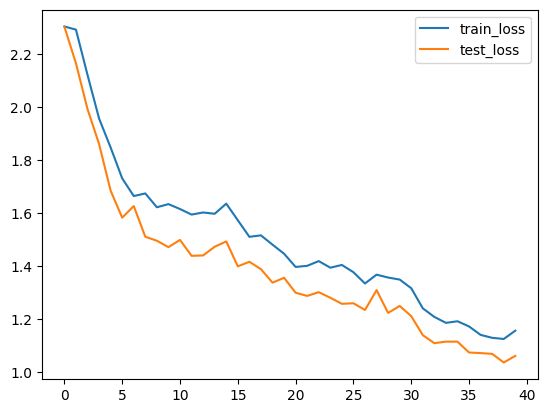

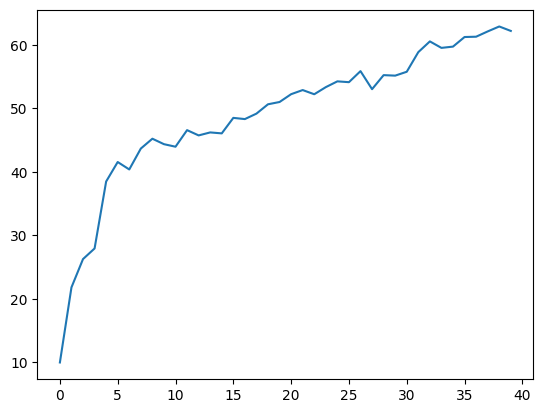

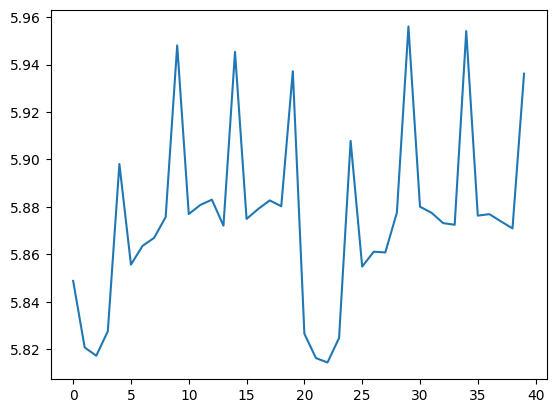

In [12]:
plt.plot(VGGNN.train_loss, label="train_loss")
plt.plot(VGGNN.test_loss, label = "test_loss")
plt.legend()
plt.show()
plt.plot(VGGNN.test_accuracy)
plt.show()
plt.plot(VGGNN.train_time)
plt.show()

In [4]:
from Models import ASL_VGGNet

ASL_VGGNN = ASL_VGGNet(input_shape, num_labels, initial_lr=0.01, momentum=0.99, weight_decay=0, device=device, p_drop=0.2, expansion_rate=2)

summary(ASL_VGGNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
ASL_VGGNet                               [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 32, 32, 32]         896
│    └─ReLU: 2-2                         [100, 32, 32, 32]         --
│    └─CSC_block: 2-3                    [100, 32, 32, 32]         --
│    │    └─Sequential: 3-1              --                        4,448
│    │    └─Identity: 3-2                [100, 32, 32, 32]         --
│    └─ReLU: 2-4                         [100, 32, 32, 32]         --
│    └─MaxPool2d: 2-5                    [100, 32, 16, 16]         --
│    └─Dropout2d: 2-6                    [100, 32, 16, 16]         --
│    └─CSC_block: 2-7                    [100, 64, 16, 16]         --
│    │    └─Sequential: 3-3              --                        4,448
│    │    └─Conv2d: 3-4                  [100, 64, 16, 16]         2,112
│    

In [5]:
PATH = "models/VGG/ASL_VGGNet.pth"

if exists(PATH):
    ASL_VGGNN = torch.load(PATH)
    ASL_VGGNN.eval()

In [6]:
criterion = CrossEntropyLoss()

train_NN(ASL_VGGNN, criterion, train_dataloader,
        test_dataloader, epochs=4, batches_to_test=100,patience=2,device=device, print_test=True, verbose=True)

[1,   100] train_loss: 2.088
test_loss: 1.824, test_accuracy: 29.95
[1,   200] train_loss: 1.839
test_loss: 1.685, test_accuracy: 37.45
[1,   300] train_loss: 1.790
test_loss: 1.651, test_accuracy: 38.27
[1,   400] train_loss: 1.745
test_loss: 1.648, test_accuracy: 39.88
[1,   500] train_loss: 1.763
test_loss: 1.626, test_accuracy: 36.65
[2,   100] train_loss: 1.740
test_loss: 1.595, test_accuracy: 39.49
[2,   200] train_loss: 1.740
test_loss: 1.606, test_accuracy: 39.0
[2,   300] train_loss: 1.744
test_loss: 1.566, test_accuracy: 40.28
[2,   400] train_loss: 1.743
test_loss: 1.650, test_accuracy: 39.25
Epoch 00009: reducing learning rate of group 0 to 5.0000e-03.
[2,   500] train_loss: 1.679
test_loss: 1.503, test_accuracy: 44.17
[3,   100] train_loss: 1.598
test_loss: 1.474, test_accuracy: 45.39
[3,   200] train_loss: 1.581
test_loss: 1.467, test_accuracy: 45.32
[3,   300] train_loss: 1.576
test_loss: 1.447, test_accuracy: 46.52
[3,   400] train_loss: 1.564
test_loss: 1.407, test_acc

In [7]:
torch.save(ASL_VGGNN, "./models/VGG/ASL_VGGNet.pth")

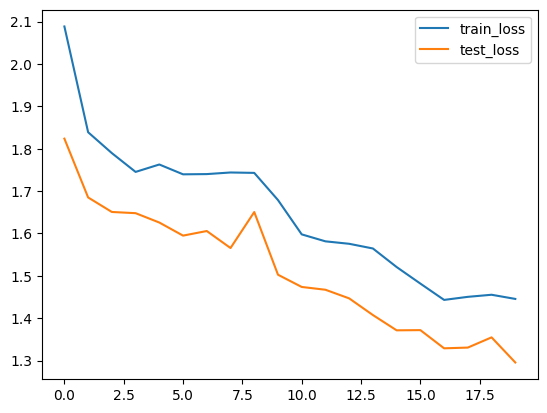

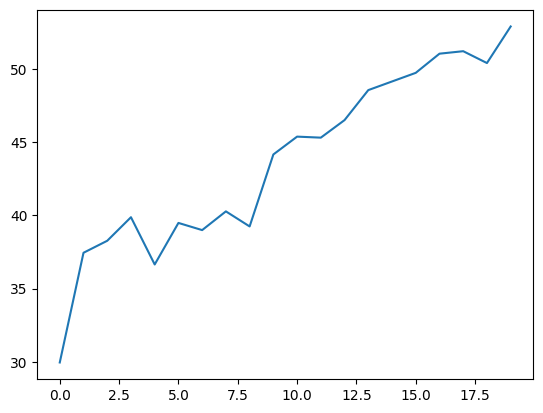

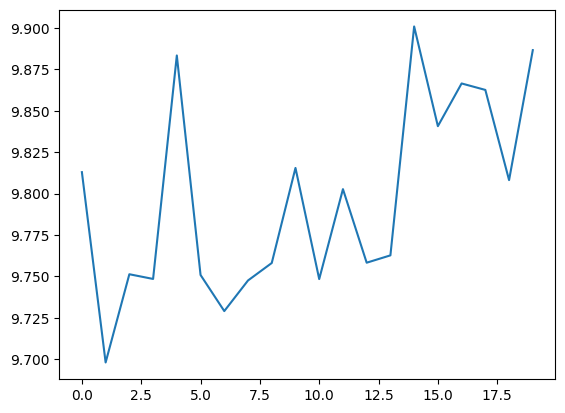

In [8]:
plt.plot(ASL_VGGNN.train_loss, label="train_loss")
plt.plot(ASL_VGGNN.test_loss, label = "test_loss")
plt.legend()
plt.show()
plt.plot(ASL_VGGNN.test_accuracy)
plt.show()
plt.plot(ASL_VGGNN.train_time)
plt.show()

CSC-block 1


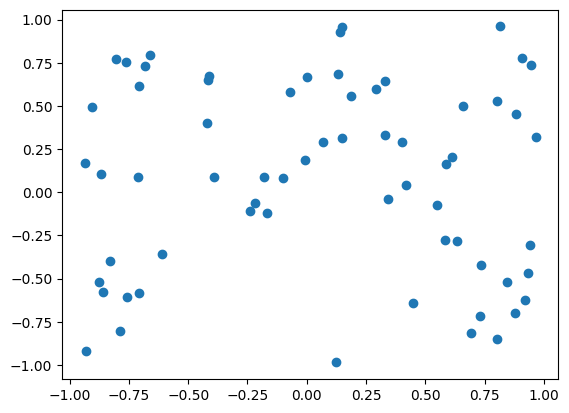

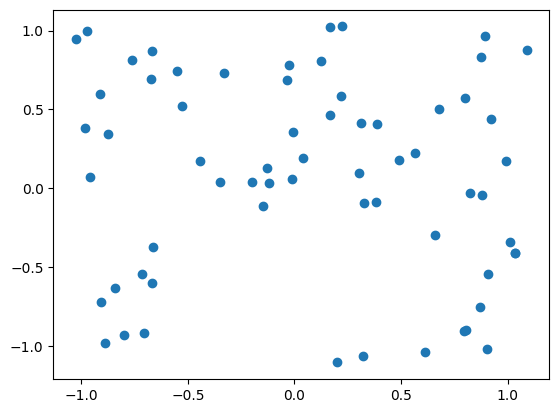

CSC-block 2


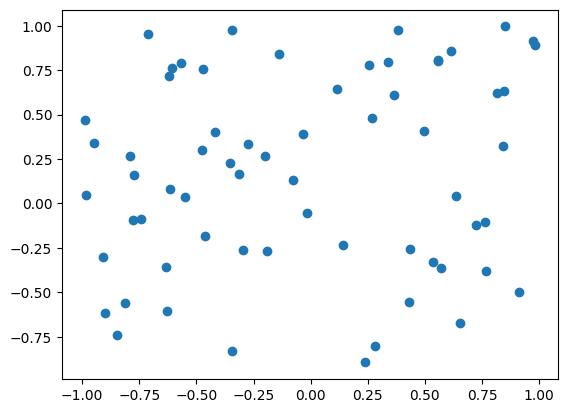

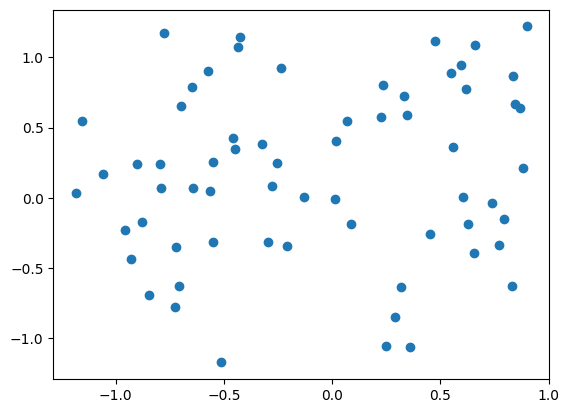

CSC-block 3


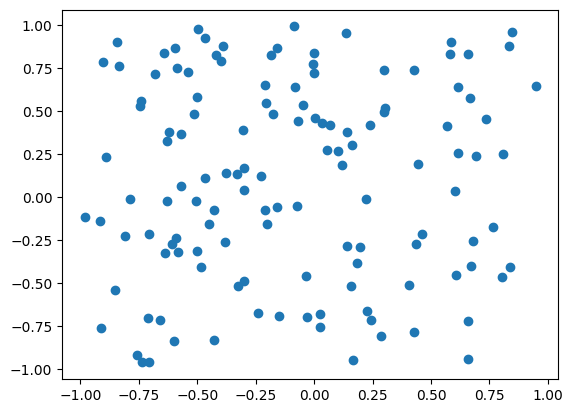

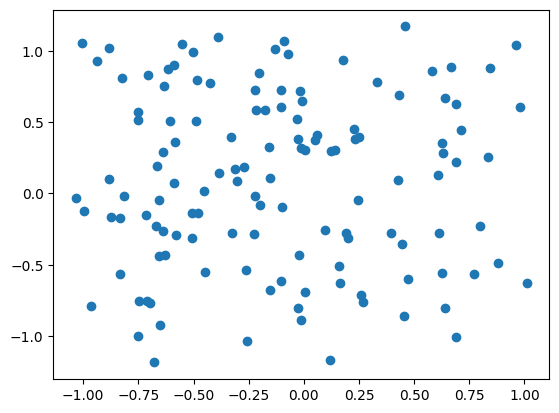

CSC-block 4


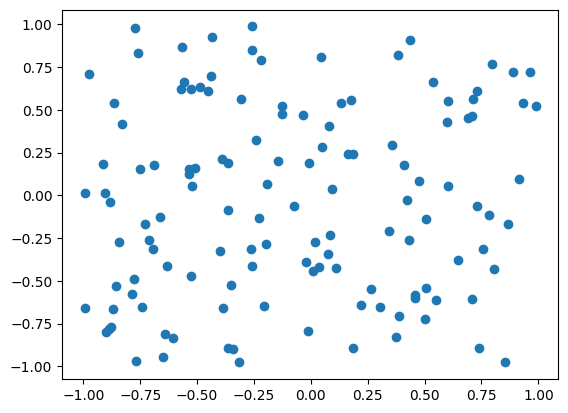

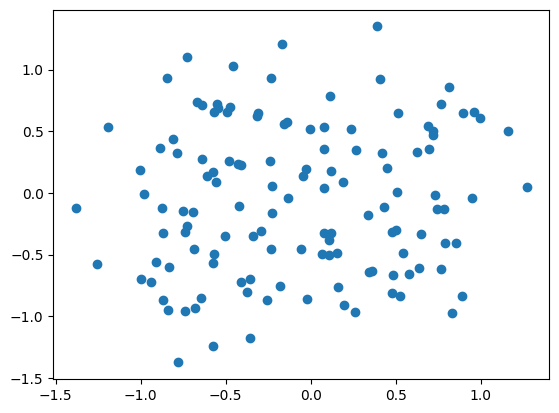

CSC-block 5


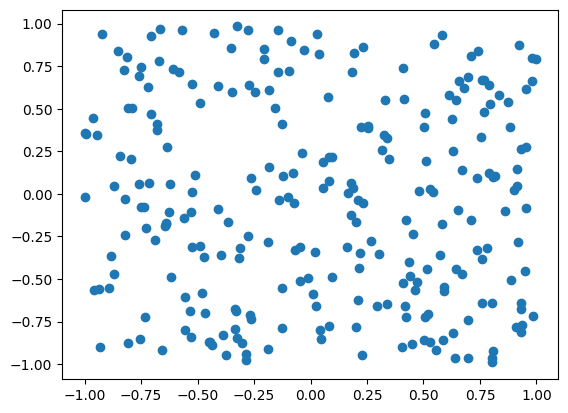

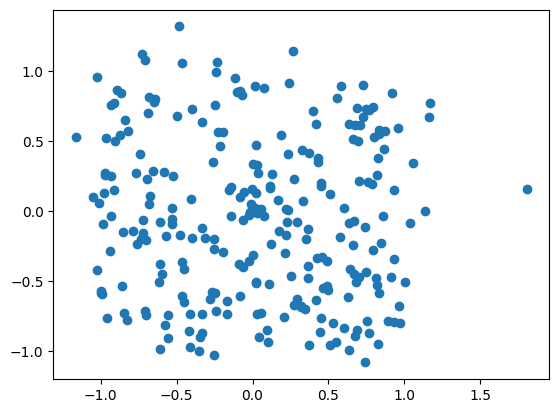

In [10]:
print("CSC-block 1")
CSC_block = ASL_VGGNN.NN[2]
points = CSC_block.NN[3].shifts.detach().to("cpu").numpy()
initial_points = CSC_block.NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

print("CSC-block 2")
CSC_block = ASL_VGGNN.NN[6]
points = CSC_block.NN[3].shifts.detach().to("cpu").numpy()
initial_points = CSC_block.NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

print("CSC-block 3")
CSC_block = ASL_VGGNN.NN[8]
points = CSC_block.NN[3].shifts.detach().to("cpu").numpy()
initial_points = CSC_block.NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

print("CSC-block 4")
CSC_block = ASL_VGGNN.NN[12]
points = CSC_block.NN[3].shifts.detach().to("cpu").numpy()
initial_points = CSC_block.NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

print("CSC-block 5")
CSC_block = ASL_VGGNN.NN[14]
points = CSC_block.NN[3].shifts.detach().to("cpu").numpy()
initial_points = CSC_block.NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()